In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [155]:
def file(list):
    idx = np.array([])
    time = np.array([])
    data = np.genfromtxt(list)
    for i in range(len(data)):
        idx = np.append(idx, data[i,0])
        time = np.append(time, data[i,1])
    time = time - time[0]
    idx = idx - 1 #indexing from 0
    return idx, time

    
E_idx, E_time = file('elias.dat')
R_idx, R_time = file('rasmus.dat')
J_idx, J_time = file('jacob.dat')

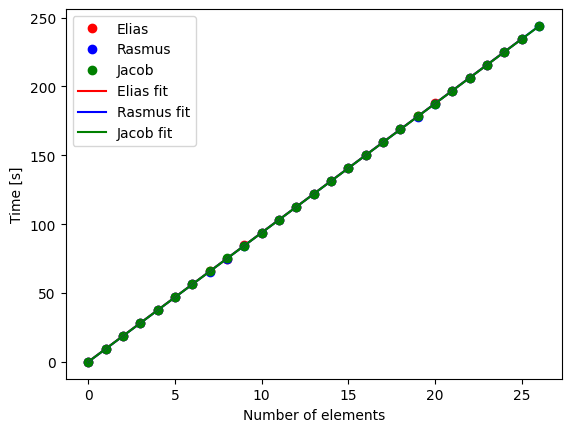

In [156]:
#Curve fitting
def line(x, a, b):
    return a * x + b

def curvefit(idx, time):
    idx = np.array(idx)  # Convert idx to numpy array
    popt, pcov = curve_fit(line, idx, time)
    return popt, pcov

E_popt, pcov_E = curvefit(E_idx, E_time)
R_popt, pcov_R = curvefit(R_idx, R_time)
J_popt, pcov_J = curvefit(J_idx, J_time)

#Plotting
plt.plot(E_idx, E_time, 'ro', label='Elias')
plt.plot(R_idx, R_time, 'bo', label='Rasmus')
plt.plot(J_idx, J_time, 'go', label='Jacob')
plt.plot(E_idx, line(np.array(E_idx), *E_popt), 'r', label = "Elias fit") 
plt.plot(R_idx, line(np.array(R_idx), *R_popt), 'b', label = "Rasmus fit")
plt.plot(J_idx, line(np.array(J_idx), *J_popt), 'g', label = "Jacob fit")
plt.xlabel('Number of elements')
plt.ylabel('Time [s]')
plt.legend()



(26,)


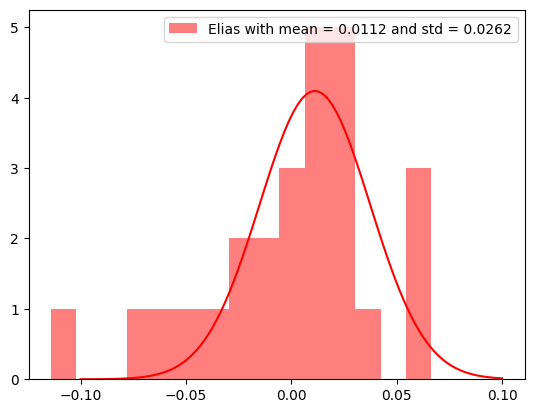

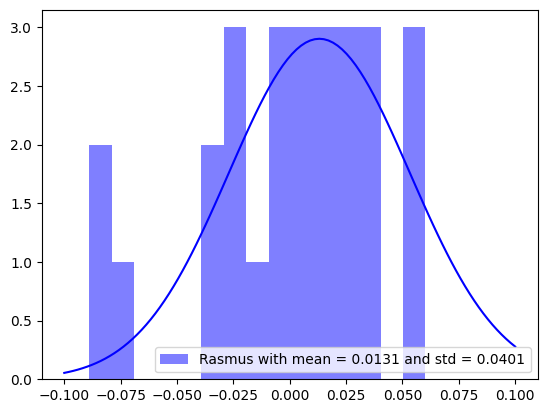

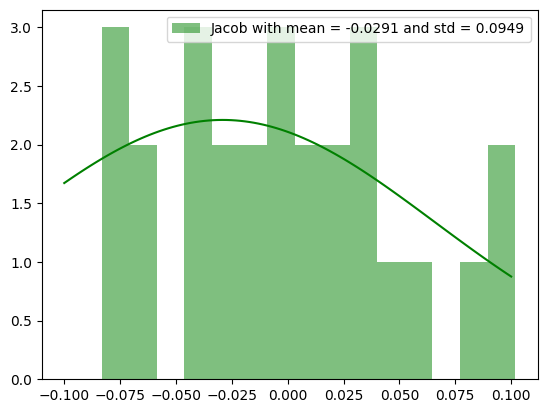

In [157]:

from scipy.stats import norm


def gauss(x, a, b,sigma):
    return a * np.exp(-(x-b)**2 / (2*sigma**2))

#Calculating the residual
def residual(idx, time, popt):
    return time - line(idx, *popt)

E_res = residual(E_idx, E_time, E_popt)
R_res = residual(R_idx, R_time, R_popt)
J_res = residual(J_idx, J_time, J_popt)
print(E_res.shape)

#curvefitting
def curvefit_residual(counts, edges):
    popt, pcov = curve_fit(gauss, edges, counts)
    return popt

xx = np.linspace(-0.1, 0.1, 100)

bins_b = 15

counts, edges = np.histogram(E_res, bins = bins_b)
counts_R, edges_R = np.histogram(R_res, bins=bins_b)
counts_J, edges_J = np.histogram(J_res, bins=bins_b)
center = (edges[:-1] + edges[1:]) / 2
center_R = (edges_R[:-1] + edges_R[1:]) / 2
center_J = (edges_J[:-1] + edges_J[1:]) / 2
error_E = np.std(E_res)/np.sqrt(len(E_res))
error_R = np.std(R_res)/np.sqrt(len(R_res))
error_J = np.std(J_res)/np.sqrt(len(J_res))
pop = curvefit_residual(counts, center)
pop_R = curvefit_residual(counts_R, center_R)
pop_J = curvefit_residual(counts_J, center_J)

plt.hist(E_res,bins = bins_b,  color='r', alpha=0.5, label='Elias with mean = %.4f and std = %.4f' % (pop[1], pop[2]))
plt.plot(xx, gauss(xx, *curvefit_residual(counts, center)), 'r')
plt.legend()
plt.show()
plt.hist(R_res,bins = bins_b,  color='b', alpha=0.5, label='Rasmus with mean = %.4f and std = %.4f' % (pop_R[1], pop_R[2]))
plt.plot(xx, gauss(xx, *curvefit_residual(counts_R, center_R)), 'b')
plt.legend()
plt.show()
plt.hist(J_res,bins =bins_b,  color='g', alpha=0.5, label='Jacob with mean = %.4f and std = %.4f' % (pop_J[1], pop_J[2]))
plt.plot(xx, gauss(xx, *curvefit_residual(counts_J, center_J)), 'g')
plt.legend()
plt.show()



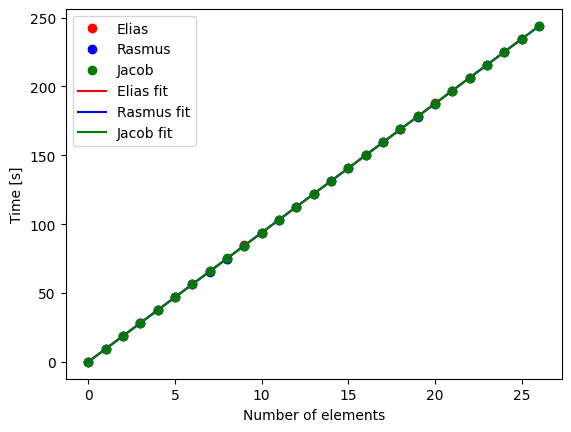

In [158]:
#error on the period
T_error_E = np.sqrt(pcov_E[0,0])
T_error_R = np.sqrt(pcov_R[0,0])
T_error_J = np.sqrt(pcov_J[0,0])


#Curve fitting
def line(x, a, b):
    return a * x + b

def curvefit(idx, time, error):
    idx = np.array(idx)  # Convert idx to numpy array
    popt, pcov = curve_fit(line, idx, time, sigma= error)
    return popt, pcov

E_popt, pcov_E = curvefit(E_idx, E_time, error_E*np.ones(len(E_time)))
R_popt, pcov_R = curvefit(R_idx, R_time, error_R*np.ones(len(R_time)))
J_popt, pcov_J = curvefit(J_idx, J_time, error_J*np.ones(len(J_time)))

#Plotting
plt.plot(E_idx, E_time, 'ro', label='Elias')
plt.plot(R_idx, R_time, 'bo', label='Rasmus')
plt.plot(J_idx, J_time, 'go', label='Jacob')
plt.plot(E_idx, line(np.array(E_idx), *E_popt), 'r', label = "Elias fit") 
plt.plot(R_idx, line(np.array(R_idx), *R_popt), 'b', label = "Rasmus fit")
plt.plot(J_idx, line(np.array(J_idx), *J_popt), 'g', label = "Jacob fit")
plt.xlabel('Number of elements')
plt.ylabel('Time [s]')
plt.legend()

C:\Users\Elias\AppData\Local\Temp\ipykernel_15956\1539903958.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


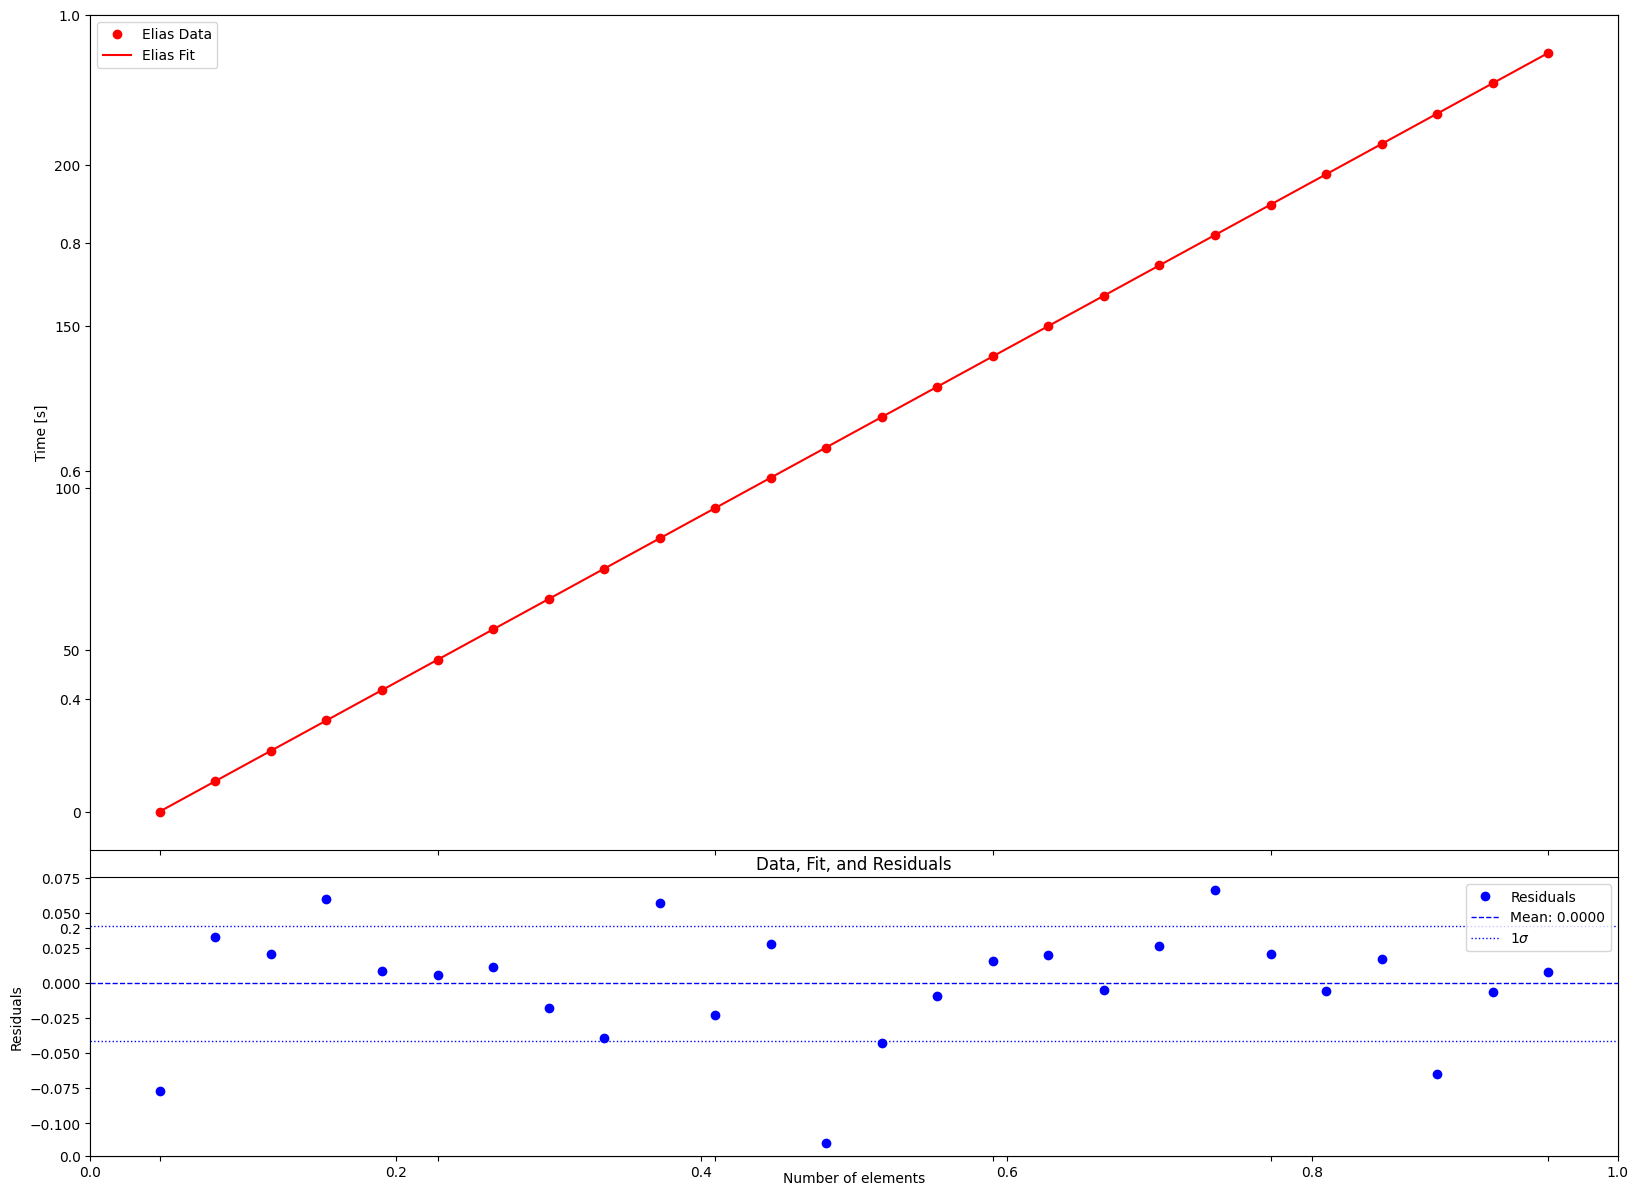

In [159]:
E_popt, pcov_E = curvefit(E_idx, E_time, error_E*np.ones(len(E_time)))

fig, ax1 = plt.subplots(figsize=(16, 12))

# fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, height_ratios=[3, 1], hspace=0.05)

error_E_res = error_E*np.sqrt(len(E_res))
error_R_res = error_R*np.sqrt(len(R_res))
error_J_res = error_J*np.sqrt(len(J_res))

# Main plot (data and fit)
ax1 = fig.add_subplot(gs[0])
ax1.plot(E_idx, E_time, 'ro', label='Elias Data')
ax1.plot(E_idx, line(E_idx, *E_popt), 'r-', label='Elias Fit')
ax1.set_ylabel('Time [s]')
ax1.legend(loc='upper left')
ax1.set_xticklabels([])  # Hide x-axis labels for the main plot

# Residuals plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(E_idx, E_res, 'bo', label='Residuals')
ax2.set_xlabel('Number of elements')
ax2.set_ylabel('Residuals')
ax2.axhline(np.mean(E_res) , color='blue', linestyle='--', linewidth=1, label='Mean: %.4f' % np.mean(E_res))
ax2.axhline(error_E_res, color='blue', linestyle=':', linewidth=1, label='1$\sigma$')
ax2.axhline(-error_E_res, color='blue', linestyle=':', linewidth=1)
ax2.legend(loc='upper right')


plt.title('Data, Fit, and Residuals')
plt.tight_layout()
plt.show()

In [160]:
#Chi2 on the residuals
def chi2(mean, residual, error):
    return np.sum((mean - residual)**2 / error**2)

chi2_E = chi2(np.mean(E_res), E_res, error_E_res)
prob_E = stats.chi2.sf(chi2_E, len(E_res)-2)
print('Chi2 Elias:', chi2_E)
print('Probability Elias:', prob_E)

chi2_R = chi2(np.mean(R_res), R_res, error_R_res)
prob_R = stats.chi2.sf(chi2_R, len(R_res)-2)
print('Chi2 Rasmus:', chi2_R)
print('Probability Rasmus:', prob_R)

chi2_J = chi2(np.mean(J_res), J_res, error_J_res)
prob_J = stats.chi2.sf(chi2_J, len(J_res)-2)
print('Chi2 Jacob:', chi2_J)
print('Probability Jacob:', prob_J)

Chi2 Elias: 26.0
Probability Elias: 0.35316493285127043
Chi2 Rasmus: 26.999999999999996
Probability Rasmus: 0.3558845302611866
Chi2 Jacob: 27.0
Probability Jacob: 0.35588453026118644


In [161]:


#Showing the periods
print("Elias period:", E_popt[0], "with error:", T_error_E)
print("Rasmus period:", R_popt[0], "with error:", T_error_R)
print("Jacob period:", J_popt[0], "with error:", T_error_J)


Elias period: 9.37858653348705 with error: 0.0011140309704593045
Rasmus period: 9.380117064258632 with error: 0.0009961418069414293
Jacob period: 9.376590018387898 with error: 0.0013018330911384259


In [ ]:
T_error_E = np.sqrt(pcov_E[0,0])
T_error_R = np.sqrt(pcov_R[0,0])
T_error_J = np.sqrt(pcov_J[0,0])

L_snor = 22.15
L_snor_error = 0.01

L_snor_minus_b = np.array([0.281,0.284,0.2825])#m
L_snor_minus = np.mean(L_snor_minus_b)
L_snor_minus_error = np.std(L_snor_minus_b, ddof = 1)/np.sqrt(len(L_snor_minus_b))
print("L_snor_minus:", L_snor_minus, "with error:", L_snor_minus_error)


L_vægt_b = np.array([30.3,30.5,30.6])*1e-3 #m
L_vægt = np.mean(L_vægt_b)
L_vægt_error = np.std(L_vægt_b, ddof = 1)/np.sqrt(len(L_vægt_b))
print("L_vægt:", L_vægt, "with error:", L_vægt_error)

def g_constant(L, period):
    return L*(2 * np.pi/period)**2

def errorPropagation(L, period, L_error, period_error):
    return np.sqrt(((4 * np.pi**2 / period**2 )* L_error)**2 + (-8)*(L * np.pi**2 / period**3 * period_error)**2)

def weighted_mean(values,errors):
    errors = np.array(errors)
    error_x = 1/np.sqrt(np.sum(1/errors**2))
    mean = error_x**2*np.sum(values/errors**2)
    return mean, error_x

L = L_snor - L_snor_minus + L_vægt/2
L_error = np.sqrt(L_snor_error**2 + L_snor_minus_error**2 + L_vægt_error**2)
print("L:", L, "with error:", L_error)


T, T_error = weighted_mean([E_popt[0], R_popt[0], J_popt[0]],[T_error_E, T_error_R, T_error_J])
print("T:", T, "with error:", T_error)


# T = np.mean([E_popt[0], R_popt[0], J_popt[0]])
# T_error = np.sqrt((T_error_E**2 + T_error_R**2 + T_error_J**2)/3)
# T_error2 = np.std([E_popt[0], R_popt[0], J_popt[0]])/np.sqrt(3)


g_snor_E = g_constant(L, E_popt[0])
g_snor_E_error = errorPropagation(L, E_popt[0], L_error, T_error_E)
print("g_snor_E:", g_snor_E, "with error:", g_snor_E_error)

g_snor_R = g_constant(L, R_popt[0])
g_snor_R_error = errorPropagation(L, R_popt[0], L_error, T_error_R)
print("g_snor_R:", g_snor_R, "with error:", g_snor_R_error)

g_snor_J = g_constant(L, J_popt[0])
g_snor_J_error = errorPropagation(L, J_popt[0], L_error, T_error_J)
print("g_snor_J:", g_snor_J, "with error:", g_snor_J_error)

#Samlet G efter at have lagt både L og T sammen
g_snor = g_constant(L, T)
g_snor_error = errorPropagation(L, T, L_error, T_error)
print("samlet g_snor:", g_snor, "with error:", g_snor_error)

L_snor_minus: 0.2825 with error: 0.0008660254037844234
L_vægt: 0.03046666666666667 with error: 8.819171036882002e-05
L: 21.882733333333334 with error: 0.010037817381172948
T: 9.378738263515453 with error: 0.0006449770157475648
g_snor_E: 9.821696841191178 with error: 0.004429133066385334
g_snor_R: 9.818491938151933 with error: 0.004443093136786093
g_snor_J: 9.825879865862197 with error: 0.004402791778387064
samlet g_snor: 9.82137905126163 with error: 0.004479773426478386
